In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from tqdm import tqdm_notebook

In [2]:
df = pd.read_csv('stanovi_podaci_filtrirani.csv')

In [3]:
df.head()

url  \
0  https://www.olx.ba/artikal/31090915/trosoban-s...   
1  https://www.olx.ba/artikal/30412030/novogradnj...   
2  https://www.olx.ba/artikal/31109536/bauland-pr...   
3  https://www.olx.ba/artikal/29115595/prostor-pr...   
4  https://www.olx.ba/artikal/30908536/novogradnj...   

                                               naziv     cijena  \
0           Trosoban stan,82m2 Čengić Vila RENOVIRAN  178900 KM   
1        NOVOGRADNJA/Otoka/stanovi/54-118m2/Sarajevo  180000 KM   
2      BAULAND prodaje: Trosoban/ Novogradnja/Pejton  163000 KM   
3  PROSTOR prodaje: NOVOGRADNJA trosoban stan sa ...  103350 KM   
4  NOVOGRADNJA Skenderija, dvoiposoban 52-53m2 AK...  182385 KM   

              lokacija        lat        lng Kvadrata     Broj soba  \
0        Novo Sarajevo  43.850312  18.369865       73  Trosoban (3)   
1        Novo Sarajevo  43.848706  18.359522       80  Trosoban (3)   
2               Ilidža  43.833914  18.299010       67  Trosoban (3)   
3  Sarajevo, Novi Grad  43.850438  18.356290       53  Trosoban (3)   
4    Sarajevo - Centar  43.852924  18.410201       52  Trosoban (3)   

                    Adresa Godina izgradnje Primarna orjentacija  
0         Džemala Bijedića        1980-1989                  NaN  
1                      NaN              NaN                  NaN  
2  Prve samostalne brigade            2010+                  NaN  
3         Džemala Bijedića      Novogradnja                Istok  
4                 Terezija      Novogradnja                  NaN

In [4]:
df.shape

(2408, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2408 entries, 0 to 2407
Data columns (total 11 columns):
url                     2408 non-null object
naziv                   2405 non-null object
cijena                  2408 non-null object
lokacija                2408 non-null object
lat                     2355 non-null float64
lng                     2355 non-null float64
Kvadrata                2404 non-null object
Broj soba               2405 non-null object
Adresa                  2236 non-null object
Godina izgradnje        1178 non-null object
Primarna orjentacija    1031 non-null object
dtypes: float64(2), object(9)
memory usage: 207.0+ KB


In [6]:
df.describe()

lat          lng
count  2355.000000  2355.000000
mean     43.800350    18.395028
std       1.468699     1.383426
min       0.351292     4.600899
25%      43.843367    18.348047
50%      43.854060    18.391108
75%      43.861224    18.413076
max      47.439547    76.923712

In [7]:
df['Broj soba'].unique()

array(['Trosoban (3)', 'Dvosoban (2)', 'Petosoban i više',
       'Jednosoban (1)', 'Četverosoban (4)', 'Garsonjera',
       'Jednoiposoban (1.5)', nan], dtype=object)

### We want our 'Broj soba' (Number of rooms) column to be numeric, so we will switch the existing values with corresponding numerical values

In [8]:

for i in tqdm_notebook(range(len(df['Broj soba']))):
    try:
        if 'Jednosoban (1)'  == df['Broj soba'][i]:
            df['Broj soba'][i] = 1
            
        if 'Jednoiposoban (1.5)'  == df['Broj soba'][i]:
            df['Broj soba'][i] = 1.5
            
        if 'Dvosoban (2)'  == df['Broj soba'][i]:
            df['Broj soba'][i] = 2
            
        if 'Trosoban (3)'  == df['Broj soba'][i]:
            df['Broj soba'][i] = 3
            
        if 'Četverosoban (4)'  == df['Broj soba'][i]:
            df['Broj soba'][i] = 4
            
        if 'Petosoban i više'  == df['Broj soba'][i]:
            df['Broj soba'][i] = 5
            
        if 'Garsonjera'  == df['Broj soba'][i]:
            df['Broj soba'][i] = 1
            
    except:
        continue

c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\users\hp\

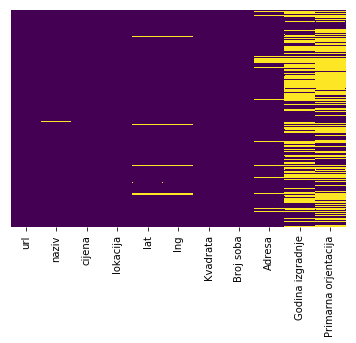

In [9]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')


### Vidimo da imamo dosta nepotpunih podataka

In [10]:
df.drop('Primarna orjentacija', axis = 1, inplace=True)

df.drop('Godina izgradnje', axis = 1, inplace=True)

In [11]:
df['cijena'].head()

0    178900 KM
1    180000 KM
2    163000 KM
3    103350 KM
4    182385 KM
Name: cijena, dtype: object

In [12]:

for i in tqdm_notebook(range(len(df['cijena']))):
    try:
        if 'PO DOGOVORU' in df['cijena'][i]:
            df['cijena'][i] = None
        if 'KM' in df['cijena'][i]:
            df['cijena'][i] = df['cijena'][i].replace(df['cijena'][i], df['cijena'][i].split('KM')[0])
        if 'km' in df['cijena'][i] :
                        df['cijena'][i] = df['cijena'][i].replace(df['cijena'][i], df['cijena'][i].split('km')[0])

    except:
        continue

c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [13]:
df['cijena'].head()

0    178900 
1    180000 
2    163000 
3    103350 
4    182385 
Name: cijena, dtype: object

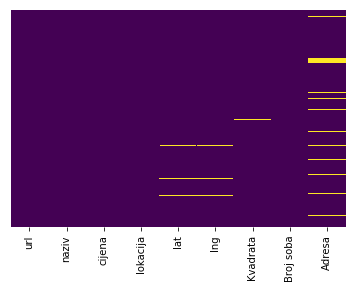

In [14]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')


In [15]:
df.dropna(inplace=True)


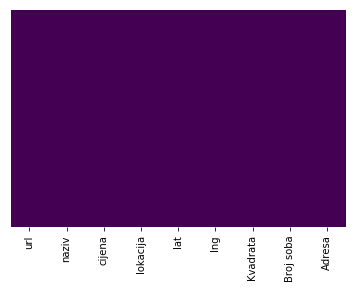

In [16]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')


### Sada imamo potpunu datu

In [17]:
df.head()

url  \
0  https://www.olx.ba/artikal/31090915/trosoban-s...   
2  https://www.olx.ba/artikal/31109536/bauland-pr...   
3  https://www.olx.ba/artikal/29115595/prostor-pr...   
4  https://www.olx.ba/artikal/30908536/novogradnj...   
5  https://www.olx.ba/artikal/30050597/prostor-pr...   

                                               naziv   cijena  \
0           Trosoban stan,82m2 Čengić Vila RENOVIRAN  178900    
2      BAULAND prodaje: Trosoban/ Novogradnja/Pejton  163000    
3  PROSTOR prodaje: NOVOGRADNJA trosoban stan sa ...  103350    
4  NOVOGRADNJA Skenderija, dvoiposoban 52-53m2 AK...  182385    
5  PROSTOR prodaje: NOVOGRADNJA Sarajevo Waves, I...  172422    

              lokacija        lat        lng Kvadrata Broj soba  \
0        Novo Sarajevo  43.850312  18.369865       73         3   
2               Ilidža  43.833914  18.299010       67         3   
3  Sarajevo, Novi Grad  43.850438  18.356290       53         3   
4    Sarajevo - Centar  43.852924  18.410201       52         3   
5               Ilidža  43.838372  18.297164       62         2   

                    Adresa  
0         Džemala Bijedića  
2  Prve samostalne brigade  
3         Džemala Bijedića  
4                 Terezija  
5                   Barska

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2196 entries, 0 to 2407
Data columns (total 9 columns):
url          2196 non-null object
naziv        2196 non-null object
cijena       2196 non-null object
lokacija     2196 non-null object
lat          2196 non-null float64
lng          2196 non-null float64
Kvadrata     2196 non-null object
Broj soba    2196 non-null object
Adresa       2196 non-null object
dtypes: float64(2), object(7)
memory usage: 171.6+ KB


In [19]:
#Switching data to numerical values

numeric_cols = ['Kvadrata','cijena', 'Broj soba']

for col in numeric_cols:
    df[col] = df[col].astype(float)
    


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2196 entries, 0 to 2407
Data columns (total 9 columns):
url          2196 non-null object
naziv        2196 non-null object
cijena       2196 non-null float64
lokacija     2196 non-null object
lat          2196 non-null float64
lng          2196 non-null float64
Kvadrata     2196 non-null float64
Broj soba    2196 non-null float64
Adresa       2196 non-null object
dtypes: float64(5), object(4)
memory usage: 171.6+ KB


In [21]:
df.describe()

cijena          lat          lng     Kvadrata    Broj soba
count  2.196000e+03  2196.000000  2196.000000  2196.000000  2196.000000
mean   1.582470e+05    43.835136    18.371566    75.052409     2.801913
std    9.815705e+04     0.931693     0.222565    41.292346     0.915653
min    1.190000e+02     0.351292     9.091047     6.000000     1.000000
25%    1.030000e+05    43.843550    18.348340    56.000000     2.000000
50%    1.360000e+05    43.854060    18.390272    70.000000     3.000000
75%    1.940000e+05    43.861109    18.413076    85.000000     3.000000
max    1.400000e+06    47.191323    18.466544  1300.000000     5.000000

### We can now visualize our data

In [22]:
df[df['cijena']==df['cijena'].max()]

url  \
901   https://www.olx.ba/artikal/22924622/my-space-s...   
1506  https://www.olx.ba/artikal/31108175/sigenx-pro...   

                                                  naziv     cijena  \
901    MY SPACE / Stambena zgrada / Stari Grad / Kovaci  1400000.0   
1506  SIGENX prodaje: TOP lokacija/ stambeno-poslovn...  1400000.0   

               lokacija        lat        lng  Kvadrata  Broj soba      Adresa  
901          Stari Grad  43.858178  18.412220     702.0        2.0  Abdesthana  
1506  Sarajevo - Centar  43.855021  18.418301     500.0        5.0  Skenderija

In [23]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import plotly.graph_objs as go

init_notebook_mode()

In [24]:

x = df['lokacija']

trace0 = go.Box(
    y=df['cijena'],
    x=x,
    name='kale',
    marker=dict(
        color='blue'
    )
)

data = [trace0]
layout = go.Layout(
    yaxis=dict(
        title='cijene',
        zeroline=False
    ),
    boxmode='group'
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

### Vidimo da imamo veoma visoke cijene, posebno u predjelu Centra i Starog grada.  Smanjit cemo nase podatke tako da obuhvatamo samo normalnije cijene

### We can see we have high prices, esspecialy in the Center and Stari Grad (Old town). We will make a subset of our data to get what we want

In [25]:

df2 = df[df['cijena'] < 400000]
df2['cijena'] = np.where(df2.cijena < 10000, df2.cijena*df2.Kvadrata, df2.cijena)

c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [26]:
x = df2['lokacija']

trace0 = go.Box(
    y=df2['cijena'],
    x=x,
    name='kale',
    marker=dict(
        color='blue'
    )
)

data = [trace0]
layout = go.Layout(
    yaxis=dict(
        title='cijene',
        zeroline=False
    ),
    boxmode='group'
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

### Still we have too many outliers 

In [27]:
df2 = df[df['cijena'] < 300000]


In [28]:
x = df2['lokacija']

trace0 = go.Box(
    y=df2['cijena'],
    x=x,
    name='kale',
    marker=dict(
        color='blue'
    )
)

data = [trace0]
layout = go.Layout(
    yaxis=dict(
        title='cijene',
        zeroline=False
    ),
    boxmode='group'
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [29]:
df2 = df2.drop(df2[df2['cijena'] < 30000].index)

In [30]:
x = df2['lokacija']

trace0 = go.Box(
    y=df2['cijena'],
    x=x,
    name='kale',
    marker=dict(
        color='blue'
    )
)

data = [trace0]
layout = go.Layout(
    yaxis=dict(
        title='cijene',
        zeroline=False
    ),
    boxmode='group'
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

###  Aaah, this is perfect

In [31]:
import plotly.figure_factory as ff

hist_data = [df2['cijena']]
group_labels = ['distplot']

fig = ff.create_distplot(hist_data, group_labels, bin_size=20)
iplot(fig, filename='Distribucija cijena')

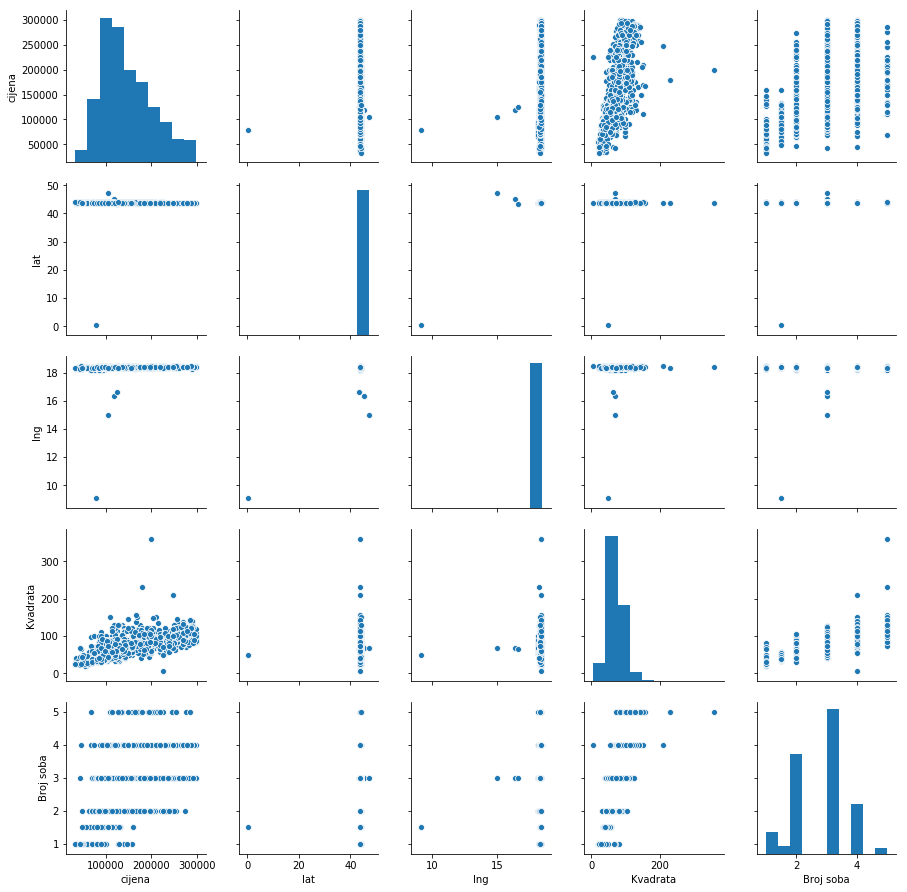

In [32]:
sns.pairplot(df2)

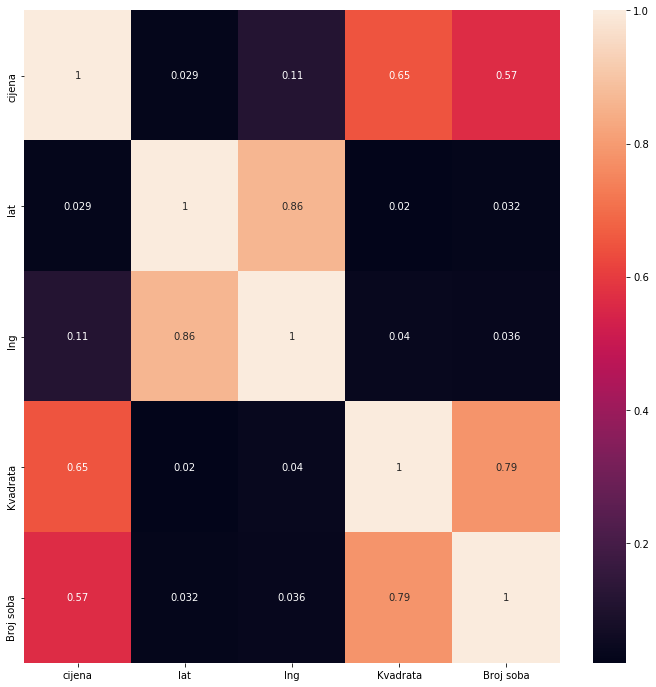

In [33]:
plt.figure(figsize=(12,12))

sns.heatmap(df2.corr(), annot=True)

In [34]:
df2['Adresa'].value_counts().head(30)

Džemala Bijedića            47
Stupska                     30
Muhameda Hadžijahića        24
Nikole Šopa                 20
Želimira Vidovića Kelija    19
Skenderija                  17
Gradačačka                  16
Adema Buće                  16
Kralja Tvrtka               16
Grbavička                   16
Barska                      16
Gandijeva                   14
Muse Ćazima Ćatića          14
Branilaca Šipa              14
Antuna Hangija              13
Olimpijska                  13
Himze Polovine              12
Bosanska                    12
Ive Andrića                 11
Paromlinska                 11
Ismeta Mujezinovića         10
Vrazova                     10
Alojza Benca                10
Hamdije Kreševljakovića     10
Zagrebačka                  10
Branilaca Sarajeva          10
Avde Smajlovića              9
Envera Šehovića              9
Titova                       9
Bjelave                      9
Name: Adresa, dtype: int64

In [35]:
df_popularna_mjesta = df2[(df2['Adresa'].isin(list(df2['Adresa'].value_counts().head(30).index)))]


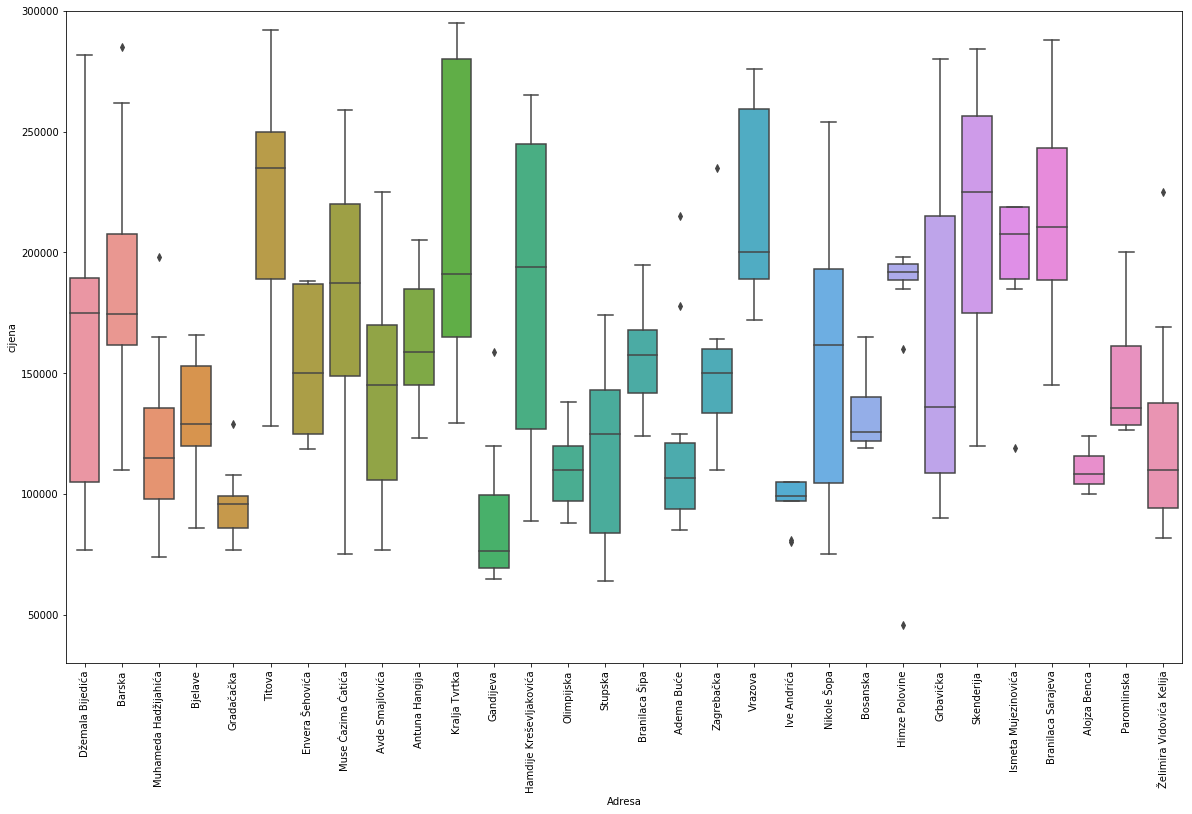

In [36]:
var = 'Adresa'
data = pd.concat([df_popularna_mjesta.cijena, df_popularna_mjesta.loc[:,var]], axis=1)
f, ax = plt.subplots(figsize=(20, 12))
fig = sns.boxplot(x=var, y="cijena", data=data)
fig.axis(ymin=30000, ymax=300000);
plt.xticks(rotation=90);

# We change the fontsize of minor ticks label 
plt.tick_params(axis='both', which='major', labelsize=10)

### Ovdje vidimo najpopularnije ulice u Kantonu

In [37]:

x = df2['Broj soba']

trace0 = go.Box(
    y=df2['cijena'],
    x=x,
    name='kale',
    marker=dict(
        color='Green'
    )
)

data = [trace0]
layout = go.Layout(
    yaxis=dict(
        title='cijena',
        zeroline=False
    ),
    xaxis = dict(title = 'Broj soba'),
    boxmode='group'
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [38]:
import folium
from folium import plugins

In [39]:
df2['cijena soba'] = df['cijena'] / df['Broj soba']

In [40]:
m = folium.Map([43.857804,18.3860903], zoom_start=12, tiles='Stamen Toner')


for i,row in df2.iterrows():
    
    red = int((row['cijena soba'] / df2['cijena soba'].mean()) * 155)
    
    green = 355 - red
    
    html = '#%02x%02x%02x' % (red, green, 0) 
    
    
    mark ='{} <br> {}m2'.format(row['cijena'], row['Broj soba'])
   
    
    popup = folium.Popup(row['cijena'], parse_html=True)
    
    folium.CircleMarker(location=[row['lat'],row['lng']], radius=(row['Broj soba']*5), color=html, fill=html, fill_opacity='0.3').add_to(m)

    

        
m

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
df2.head()

url  \
0  https://www.olx.ba/artikal/31090915/trosoban-s...   
2  https://www.olx.ba/artikal/31109536/bauland-pr...   
3  https://www.olx.ba/artikal/29115595/prostor-pr...   
4  https://www.olx.ba/artikal/30908536/novogradnj...   
5  https://www.olx.ba/artikal/30050597/prostor-pr...   

                                               naziv    cijena  \
0           Trosoban stan,82m2 Čengić Vila RENOVIRAN  178900.0   
2      BAULAND prodaje: Trosoban/ Novogradnja/Pejton  163000.0   
3  PROSTOR prodaje: NOVOGRADNJA trosoban stan sa ...  103350.0   
4  NOVOGRADNJA Skenderija, dvoiposoban 52-53m2 AK...  182385.0   
5  PROSTOR prodaje: NOVOGRADNJA Sarajevo Waves, I...  172422.0   

              lokacija        lat        lng  Kvadrata  Broj soba  \
0        Novo Sarajevo  43.850312  18.369865      73.0        3.0   
2               Ilidža  43.833914  18.299010      67.0        3.0   
3  Sarajevo, Novi Grad  43.850438  18.356290      53.0        3.0   
4    Sarajevo - Centar  43.852924  18.410201      52.0        3.0   
5               Ilidža  43.838372  18.297164      62.0        2.0   

                    Adresa   cijena soba  
0         Džemala Bijedića  59633.333333  
2  Prve samostalne brigade  54333.333333  
3         Džemala Bijedića  34450.000000  
4                 Terezija  60795.000000  
5                   Barska  86211.000000

In [43]:
from sklearn.ensemble import RandomForestRegressor

In [44]:
df2 = df2.join(pd.get_dummies(df.lokacija))
df2 = df2.join(pd.get_dummies(df.Adresa))

df2 = df2.drop(['lokacija', 'Adresa', 'url', 'naziv', 'cijena soba'], axis=1)
df2.head()

cijena        lat        lng  Kvadrata  Broj soba  Hadžići  Ilidža  \
0  178900.0  43.850312  18.369865      73.0        3.0        0       0   
2  163000.0  43.833914  18.299010      67.0        3.0        0       1   
3  103350.0  43.850438  18.356290      53.0        3.0        0       0   
4  182385.0  43.852924  18.410201      52.0        3.0        0       0   
5  172422.0  43.838372  18.297164      62.0        2.0        0       1   

   Ilijaš  Novo Sarajevo  Sarajevo - Centar      ...       Šoping-Grbavica  \
0       0              1                  0      ...                     0   
2       0              0                  0      ...                     0   
3       0              0                  0      ...                     0   
4       0              0                  1      ...                     0   
5       0              0                  0      ...                     0   

   Štrosmajeova  Želimir Vidović Keli 4g  Želimira Vidovića Kelija  \
0             0                        0                         0   
2             0                        0                         0   
3             0                        0                         0   
4             0                        0                         0   
5             0                        0                         0   

   Željeznička  Žrtava Fašizma  Žrtava Fašizma 2  Žrtava fašizma  \
0            0               0                 0               0   
2            0               0                 0               0   
3            0               0                 0               0   
4            0               0                 0               0   
5            0               0                 0               0   

   Žrtava fašizma 2  Žunovačka 34  
0                 0             0  
2                 0             0  
3                 0             0  
4                 0             0  
5                 0             0  

[5 rows x 994 columns]

In [45]:
X = df2.drop('cijena', axis=1)
y= df2['cijena']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3 )

In [47]:
rfr = RandomForestRegressor(n_estimators=50)

In [48]:
rfr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [49]:
pred = rfr.predict(X_test)

In [50]:
rfr.score(X_test, y_test)

0.7510926015102297

In [51]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, pred))

28405.25066090341

In [52]:
error = (abs(pred - y_test)/y_test)*100



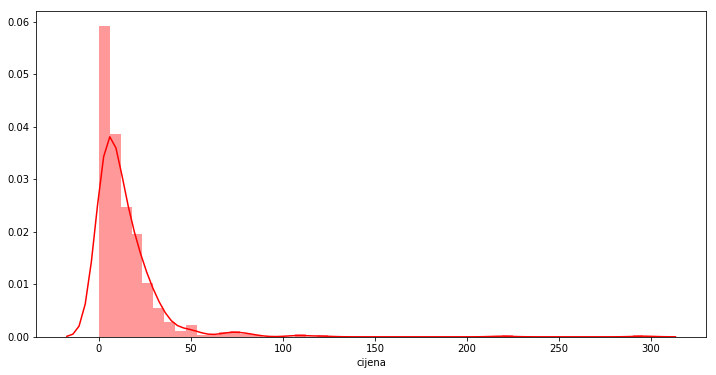

In [53]:
plt.figure(figsize=(12,6))
sns.distplot(error, color='red')


In [54]:
error2 = []

for i in error:
    if i>0.15:
        error2.append(i)

In [55]:
len(error2)

584

In [56]:
len(error)

594

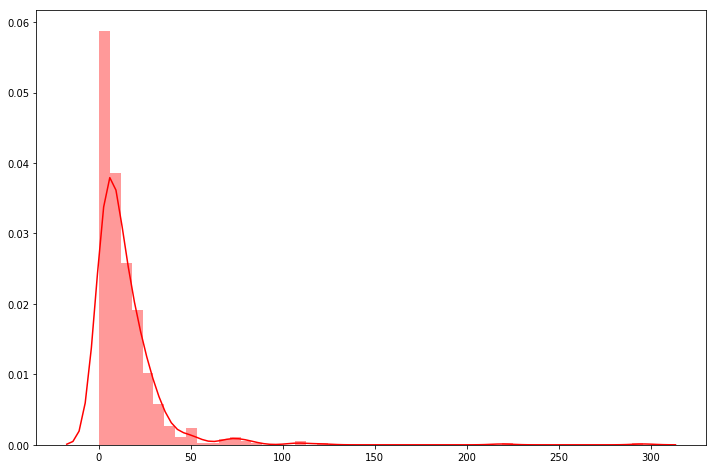

In [57]:
plt.figure(figsize=(12,8))
sns.distplot(error2, color='red')

### This is our error over 15%

In [58]:
error2 = pd.DataFrame(error)
result = pd.DataFrame(X_test)
error2.columns = ['error']
frames = [result, error2]
result = pd.concat(frames, axis=1, sort=False)

In [59]:
result.head()

lat        lng  Kvadrata  Broj soba  Hadžići  Ilidža  Ilijaš  \
1502  43.882309  18.409214      71.3        3.0        0       0       0   
407   43.854385  18.379285      52.0        2.0        0       0       0   
2152  43.842426  18.324072     118.0        4.0        0       1       0   
961   43.835241  18.321336      70.0        3.0        0       0       0   
1130  43.862303  18.426759     104.0        3.0        0       0       0   

      Novo Sarajevo  Sarajevo - Centar  Sarajevo, Novi Grad    ...      \
1502              0                  1                    0    ...       
407               1                  0                    0    ...       
2152              0                  0                    0    ...       
961               0                  0                    1    ...       
1130              0                  0                    0    ...       

      Štrosmajeova  Želimir Vidović Keli 4g  Želimira Vidovića Kelija  \
1502             0                        0                         0   
407              0                        0                         0   
2152             0                        0                         0   
961              0                        0                         0   
1130             0                        0                         0   

      Željeznička  Žrtava Fašizma  Žrtava Fašizma 2  Žrtava fašizma  \
1502            0               0                 0               0   
407             0               0                 0               0   
2152            0               0                 0               0   
961             0               0                 0               0   
1130            0               0                 0               0   

      Žrtava fašizma 2  Žunovačka 34      error  
1502                 0             0   2.313033  
407                  0             0  10.647619  
2152                 0             0   4.418079  
961                  0             0   2.597904  
1130                 0             0  14.774138  

[5 rows x 994 columns]

In [60]:
result = pd.concat(frames, axis=1, sort=False)
result['real values'] = y_test
result['predictions'] = pred

In [61]:
result.head()

lat        lng  Kvadrata  Broj soba  Hadžići  Ilidža  Ilijaš  \
1502  43.882309  18.409214      71.3        3.0        0       0       0   
407   43.854385  18.379285      52.0        2.0        0       0       0   
2152  43.842426  18.324072     118.0        4.0        0       1       0   
961   43.835241  18.321336      70.0        3.0        0       0       0   
1130  43.862303  18.426759     104.0        3.0        0       0       0   

      Novo Sarajevo  Sarajevo - Centar  Sarajevo, Novi Grad     ...       \
1502              0                  1                    0     ...        
407               1                  0                    0     ...        
2152              0                  0                    0     ...        
961               0                  0                    1     ...        
1130              0                  0                    0     ...        

      Želimira Vidovića Kelija  Željeznička  Žrtava Fašizma  Žrtava Fašizma 2  \
1502                         0            0               0                 0   
407                          0            0               0                 0   
2152                         0            0               0                 0   
961                          0            0               0                 0   
1130                         0            0               0                 0   

      Žrtava fašizma  Žrtava fašizma 2  Žunovačka 34      error  real values  \
1502               0                 0             0   2.313033     171100.0   
407                0                 0             0  10.647619     105000.0   
2152               0                 0             0   4.418079     247800.0   
961                0                 0             0   2.597904     125000.0   
1130               0                 0             0  14.774138     275000.0   

      predictions  
1502    175057.60  
407     116180.00  
2152    236852.00  
961     128247.38  
1130    234371.12  

[5 rows x 996 columns]

In [62]:
error_over_30 = result[result['error']>30]

In [63]:
error_over_30.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58 entries, 737 to 2101
Columns: 996 entries, lat to predictions
dtypes: float64(7), uint8(989)
memory usage: 59.6 KB


In [64]:
error_over_30['error'].max()

295.8177777777778

In [65]:
error_over_30[error_over_30['error']==273.67333333333335]

Empty DataFrame
Columns: [lat, lng, Kvadrata, Broj soba, Hadžići, Ilidža, Ilijaš, Novo Sarajevo, Sarajevo - Centar, Sarajevo, Novi Grad, Stari Grad, Trnovo, Vogošća, 100866, 101160, 101180, 101234, 101405, 101524, 101665, 101814, 101839, 101876, 101985, 102109, 102116, 102141, 102226, 103046, 103052, 103118, 103129, 103132, 103137, 103141, 103146, 126 ilijaske brigade br.22, 1950-1959, 1960-1969, 1970-1979, 1980-1989, 1990-1999, 2000-2009, 2010+, 2015+, 24 JUNA, 24. JUNA, 24. Juni, 24. juna, 6, 60, ANTUNA HANGIJA, Abdesthana, Adema Buce, Adema Buća 17, Adema Buće, Adema Buće 110, Adema Buće 80, Adema Buča 13, Adema Buče, Adija Mulabegovica, Adija Mulabegovića, Ahmeda Muradbegovića, Ahmeda Muratbegovića, Ahmeta Muratbegovica, Akademika Petra Mandica 14, Akifa Seremeta, Akifa Šeremeta, Akifa Šeremeta br 9, Akifa Šeremete, Aleja Bosne Srebrne, Aleja Lipa, Aleja lipa, Alekse Santica, Alibega Firdusa, Alifakovac, Alije Nametka, Alipasina, Alipasino Polje C faza, Alipasino Polje, Trg ZavnoBiHa-a, B faza, Alipašina, Alipašina 47, Alipašina preko puta pijace, Alipašina preko puta pumpe EP, Alipašina ulica, Alipašino polje, Ališašina, Aloja Benca, Alojza Benca, Alojza Benca 1, Alojza Benca 11, Andreja Andrejevića, Ante Babica, Ante Babica 5, Ante Babića, Antuna Branka Simica, Antuna Branka Simica 2, Antuna Branka Simica/kod Bosmala, Antuna Branka Šimića, Antuna Hangija, ...]
Index: []

[0 rows x 996 columns]

In [66]:
df[df['lng']==18.440448]

url  \
763  https://www.olx.ba/artikal/25711493/stari-grad...   

                                      naziv   cijena    lokacija        lat  \
763  Stari Grad , stan od 64 m2 na prodaju!  45000.0  Stari Grad  43.859313   

           lng  Kvadrata  Broj soba      Adresa  
763  18.440448      64.0        4.0  Nevjestina

In [67]:
error_over_30 =  error_over_30.drop(['error', 'real values', 'predictions'], axis=1)
error_over_30.head()

lat        lng  Kvadrata  Broj soba  Hadžići  Ilidža  Ilijaš  \
737   43.859131  18.421311      64.0        2.0        0       0       0   
2094  43.860033  18.429987      70.0        3.0        0       0       0   
1957  43.868156  18.403892      83.0        3.0        0       0       0   
91    43.845144  18.326283      97.5        3.0        0       1       0   
1405  43.841308  18.297770      62.0        2.0        0       1       0   

      Novo Sarajevo  Sarajevo - Centar  Sarajevo, Novi Grad      ...       \
737               0                  1                    0      ...        
2094              0                  0                    0      ...        
1957              0                  1                    0      ...        
91                0                  0                    0      ...        
1405              0                  0                    0      ...        

      Šoping-Grbavica  Štrosmajeova  Želimir Vidović Keli 4g  \
737                 0             0                        0   
2094                0             0                        0   
1957                0             0                        0   
91                  0             0                        0   
1405                0             0                        0   

      Želimira Vidovića Kelija  Željeznička  Žrtava Fašizma  Žrtava Fašizma 2  \
737                          0            0               0                 0   
2094                         0            0               0                 0   
1957                         0            0               0                 0   
91                           0            0               0                 0   
1405                         0            0               0                 0   

      Žrtava fašizma  Žrtava fašizma 2  Žunovačka 34  
737                0                 0             0  
2094               0                 0             0  
1957               0                 0             0  
91                 0                 0             0  
1405               0                 0             0  

[5 rows x 993 columns]

In [68]:
analiza = error_over_30[['lat', 'lng', 'Kvadrata', 'Broj soba' ,'Hadžići','Ilidža','Ilijaš','Novo Sarajevo','Sarajevo - Centar','Sarajevo, Novi Grad','Stari Grad','Trnovo','Vogošća']]

In [69]:
analiza.head()

lat        lng  Kvadrata  Broj soba  Hadžići  Ilidža  Ilijaš  \
737   43.859131  18.421311      64.0        2.0        0       0       0   
2094  43.860033  18.429987      70.0        3.0        0       0       0   
1957  43.868156  18.403892      83.0        3.0        0       0       0   
91    43.845144  18.326283      97.5        3.0        0       1       0   
1405  43.841308  18.297770      62.0        2.0        0       1       0   

      Novo Sarajevo  Sarajevo - Centar  Sarajevo, Novi Grad  Stari Grad  \
737               0                  1                    0           0   
2094              0                  0                    0           1   
1957              0                  1                    0           0   
91                0                  0                    0           0   
1405              0                  0                    0           0   

      Trnovo  Vogošća  
737        0        0  
2094       0        0  
1957       0        0  
91         0        0  
1405       0        0

In [70]:
from sklearn.cluster import KMeans

In [71]:
sum_sq_dist = []

K = range(1, 15)

for k in K:
    
    km = KMeans(n_clusters=k)
    
    km = km.fit(analiza)
    
    sum_sq_dist.append(km.inertia_)
    

Text(0.5, 1.0, 'Elbow method for optimal k')

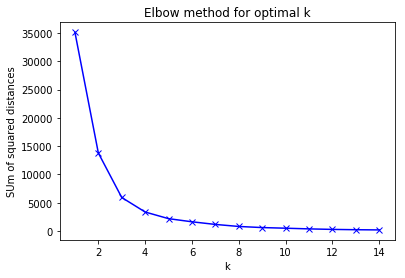

In [72]:
plt.plot(K, sum_sq_dist, 'bx-')

plt.xlabel('k')
plt.ylabel('SUm of squared distances')
plt.title('Elbow method for optimal k')



In [73]:
km = KMeans(n_clusters=7)

km.fit(analiza)

pd.options.display.float_format = '{:,.3f}'.format

pd.DataFrame(km.cluster_centers_, columns=analiza.columns)

lat    lng  Kvadrata  Broj soba  Hadžići  Ilidža  Ilijaš  Novo Sarajevo  \
0 43.851 18.351    35.059      1.125    0.000   0.375   0.000          0.125   
1 43.833 18.311    95.167      3.000    0.000   1.000   0.000          0.000   
2 43.851 18.385    67.077      2.615    0.000   0.077   0.000          0.077   
3 43.859 18.431   145.000      5.000    0.000   0.000   0.000          0.000   
4 43.831 18.335   118.000      4.400    0.000   0.200   0.000          0.200   
5 43.851 18.378    79.708      3.083    0.000   0.333   0.000          0.167   
6 43.858 18.401    54.362      2.188    0.000   0.063   0.000          0.125   

   Sarajevo - Centar  Sarajevo, Novi Grad  Stari Grad  Trnovo  Vogošća  
0              0.250                0.125       0.000  -0.000    0.125  
1              0.000                0.000       0.000   0.000    0.000  
2              0.077                0.385       0.308  -0.000    0.077  
3              0.000                0.000       1.000   0.000    0.000  
4              0.200                0.000       0.000   0.200    0.200  
5              0.250                0.083       0.167  -0.000    0.000  
6              0.562                0.125       0.125  -0.000    0.000

In [74]:
analiza['cluster'] = km.predict(analiza)

In [75]:
analiza.cluster.value_counts()

6    16
2    13
5    12
0     8
4     5
1     3
3     1
Name: cluster, dtype: int64

###  We can see now wich clusters cause the biggest problem to our model

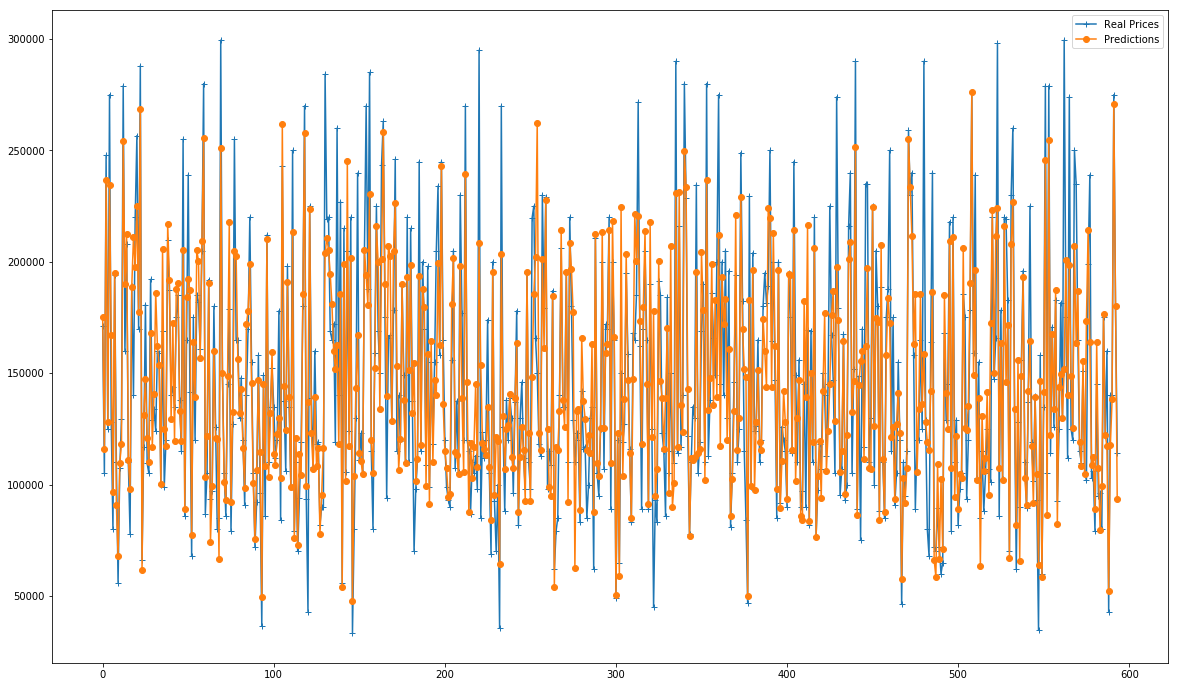

In [78]:
plt.figure(figsize=(20,12))

plt.plot(range(0, y_test.shape[0]), y_test, marker='+', label='Real Prices')
plt.plot(range(0, pred.shape[0]), pred, marker='o', label = 'Predictions')
plt.legend()

### Here we have our predictions with 75% accuracy